In [1]:
from collections import Counter
from pathlib import Path

import snap
import matplotlib.pyplot as plt
import numpy as np

# 1. Analyzing the Wikipedia voters network


In [2]:
G = snap.LoadEdgeListStr(snap.PNGraph, 'Wiki-Vote.txt', 0, 1)

## 1.1

In [3]:
print("Number of Nodes: %d" % G.GetNodes())

Number of Nodes: 7115


## 1.2


In [4]:
Edges = G.Edges()
self_edges_cnt = 0
for Edge in Edges:
    src, dst = Edge.GetSrcNId(), Edge.GetDstNId(),
    if src == dst:
        self_edges_cnt += 1

CountSelfEdges = snap.CntSelfEdges(G)
print(f'Number of self edges: {CountSelfEdges}')

Number of self edges: 0


## 1.3

In [5]:
Edges = G.Edges()
dir_edges_cnt = 0
for Edge in Edges:
    src, dst = Edge.GetSrcNId(), Edge.GetDstNId()
    if src != dst:
        dir_edges_cnt += 1

print(dir_edges_cnt)

103689


In [6]:
Count = snap.CntUniqDirEdges(G)
print("Directed Graph: Count of unique directed edges is %d" % Count)

Directed Graph: Count of unique directed edges is 103689


## 1.4

In [7]:
Count = snap.CntUniqUndirEdges(G)
print("Directed Graph: Count of unique undirected edges is %d" % Count)

Directed Graph: Count of unique undirected edges is 100762


## 1.5

In [8]:
count = 0
edges_set = set()
for Edge in G.Edges():
    src, dst = Edge.GetSrcNId(), Edge.GetDstNId()
    res = (src, dst)
    if (dst, src) in edges_set:
        count += 1
    else:
        edges_set.add((src, dst))
print(f'The number of reciprocated edges: {count}')

print('or')

count = snap.CntUniqDirEdges(G) - snap.CntUniqUndirEdges(G)
print(f'The number of reciprocated edges: {count}')

The number of reciprocated edges: 2927
or
The number of reciprocated edges: 2927


## 1.6

In [9]:
Count = snap.CntOutDegNodes(G, 0)
print("Directed Graph: Count of nodes with out-degree 0 is %d" % Count)

Directed Graph: Count of nodes with out-degree 0 is 1005


## 1.7

In [10]:
Count = snap.CntInDegNodes(G, 0)
print("Directed Graph: Count of nodes with in-degree 0 is %d" % Count)

Directed Graph: Count of nodes with in-degree 0 is 4734


## 1.8

In [11]:
DegToCntV = snap.TIntPrV()
snap.GetOutDegCnt(G, DegToCntV)
count = 0
for item in DegToCntV:
    deg = item.GetVal1()
    number = item.GetVal2()
    if deg > 10:
        count += number
print(f'The number of nodes with more than 10 outgoing edges: {count}')

The number of nodes with more than 10 outgoing edges: 1612


## 1.9

In [12]:
DegToCntV = snap.TIntPrV()
snap.GetInDegCnt(G, DegToCntV)
count = 0
for item in DegToCntV:
    deg = item.GetVal1()
    number = item.GetVal2()
    if deg < 10:
        count += number
print(f'The number of nodes with fewer than 10 incoming edges: {count}')

The number of nodes with fewer than 10 incoming edges: 5165


# 2. Further Analyzing the Wikipedia voters network

## 2.1

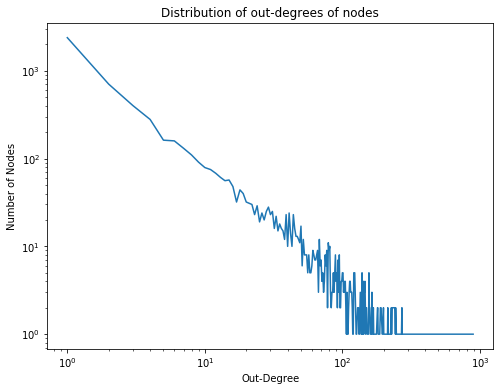

In [13]:
DegToCntV = snap.TIntPrV()
snap.GetOutDegCnt(G, DegToCntV)
x = []
y = []
for item in DegToCntV:
    x.append(item.GetVal1())
    y.append(item.GetVal2())

x = x[1:]
y = y[1:]
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(x, y);
plt.title('Distribution of out-degrees of nodes')
plt.xlabel('Out-Degree')
plt.ylabel('Number of Nodes')
plt.yscale('log')
plt.xscale('log')
plt.show()

## 2.2

In [14]:
x_log = np.log10(x)
y_log = np.log10(y)
p = np.polyfit(x_log, y_log, deg=1)
y_p = (np.array(x) ** p[0]) * (10 ** p[1])

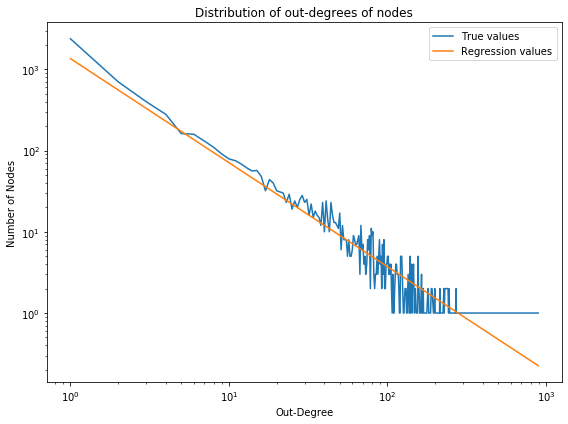

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(x, y, label='True values');
plt.plot(x, y_p, label='Regression values')
plt.title('Distribution of out-degrees of nodes')
plt.xlabel('Out-Degree')
plt.ylabel('Number of Nodes')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Finding Experts on the Java Programming Language on StackOverflow

In [17]:
G = snap.LoadEdgeListStr(snap.PNGraph, 'stackoverflow-Java.txt', 0, 1)

## 3.1

In [18]:
Components = snap.TCnComV()
snap.GetWccs(G, Components)
print(f'Number of weakly connected components: {len(Components)}')

Number of weakly connected components: 10143


## 3.2

In [19]:
MxWcc = snap.GetMxWcc(G)
N_Nodes = MxWcc.GetNodes()
N_Edges = MxWcc.GetEdges()
print(f'In the largest weakly connected component\nThe number of edges: {N_Nodes}\nThe number of nodes: {N_Edges}')

In the largest weakly connected component
The number of edges: 131188
The number of nodes: 322486


## 3.3

In [20]:
PRankH = snap.TIntFltH()
PR = snap.GetPageRank(G, PRankH)
PRankH.SortByDat(False)
for idx, item in enumerate(PRankH):
    if idx > 2:
        break
    print(f'Node Id: {item}, PageRank: {PRankH[item]}')

Node Id: 59025, PageRank: 0.013980540412209592
Node Id: 6944, PageRank: 0.010005538895741885
Node Id: 1027, PageRank: 0.00710353269312863


## 3.4

In [21]:
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(G, NIdHubH, NIdAuthH)

In [22]:
NIdHubH.SortByDat(False)
NIdAuthH.SortByDat(False)    

In [23]:
print('top 3 hubs')
for i, key, in enumerate(NIdHubH):
    print(key, NIdHubH[key])
    if i >= 2:
        break

top 3 hubs
39488 0.07336380373389545
52926 0.0595507441879448
15703 0.05687564588068674


In [24]:
print('top 3 authorities')
for i, key, in enumerate(NIdAuthH):
    print(key, NIdHubH[key])
    if i >= 2:
        break

top 3 authorities
1027 0.0
1594 0.005746760032688366
25353 0.0002073792076165951
